In [1]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#read files
cons = pd.read_csv('la_load.csv')
weather = pd.read_csv('la_weather.csv')

In [3]:
#quick view of 
weather.head()

,Datetime,Temperature,Humidity
0,2014-12-31 16:00:00,11.1,15.0
1,2014-12-31 17:00:00,10.0,16.0
2,2014-12-31 18:00:00,8.9,25.0
3,2014-12-31 19:00:00,6.7,31.0
4,2014-12-31 20:00:00,6.7,28.0


In [4]:
cons.head()

,Unnamed: 0,load
0,2015-07-02 00:00:00,3448.0
1,2015-07-02 01:00:00,3141.0
2,2015-07-02 02:00:00,2935.0
3,2015-07-02 03:00:00,2802.0
4,2015-07-02 04:00:00,2704.0


In [7]:
#Rename Q2 columns
cons.rename(columns={'Unnamed: 0': 'Datetime'}, inplace=True)

In [8]:
cons.head()

,Datetime,load
0,2015-07-02 00:00:00,3448.0
1,2015-07-02 01:00:00,3141.0
2,2015-07-02 02:00:00,2935.0
3,2015-07-02 03:00:00,2802.0
4,2015-07-02 04:00:00,2704.0


In [9]:
# Perform the merge using the common column
fin = pd.merge(weather, cons, on='Datetime')


In [10]:
fin['Datetime'] = pd.to_datetime(fin['Datetime'], format = "%Y-%m-%d %H:%M:%S")

#New columns made to analyse the load by month.
fin['month'] = fin['Datetime'].dt.month_name()

In [11]:
fin.head()

,Datetime,Temperature,Humidity,load,month
0,2015-07-02 00:00:00,23.3,60.0,3448.0,July
1,2015-07-02 01:00:00,22.8,61.0,3141.0,July
2,2015-07-02 02:00:00,22.8,57.0,2935.0,July
3,2015-07-02 03:00:00,22.8,59.0,2802.0,July
4,2015-07-02 04:00:00,22.2,61.0,2704.0,July


In [12]:
#check for missing values
missing_values_count = fin.isnull().sum()
missing_values_count[:]

Datetime        0
Temperature    50
Humidity       87
load           47
month           0
dtype: int64

In [13]:
#more information about fin
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45988 entries, 0 to 45987
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     45988 non-null  datetime64[ns]
 1   Temperature  45938 non-null  float64       
 2   Humidity     45901 non-null  float64       
 3   load         45941 non-null  float64       
 4   month        45988 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.8+ MB


In [14]:
fin.dropna(inplace=True)

In [15]:
#check for missing values
missing_values_count = fin.isnull().sum()
missing_values_count[:]

Datetime       0
Temperature    0
Humidity       0
load           0
month          0
dtype: int64

In [16]:
#more information about fin
fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45854 entries, 0 to 45987
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     45854 non-null  datetime64[ns]
 1   Temperature  45854 non-null  float64       
 2   Humidity     45854 non-null  float64       
 3   load         45854 non-null  float64       
 4   month        45854 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.1+ MB


In [17]:
# Get the number of unique values in Datetime column
unique_count = fin['Datetime'].nunique()

print("Number of unique values in Datetime:", unique_count)

Number of unique values in Datetime: 45842


In [18]:
#Remove duplicates
#Drop missing values in columns where all info needs to be complete.
fin = fin.drop_duplicates(subset=['Datetime'])

In [19]:
#more information about fin
fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45842 entries, 0 to 45987
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     45842 non-null  datetime64[ns]
 1   Temperature  45842 non-null  float64       
 2   Humidity     45842 non-null  float64       
 3   load         45842 non-null  float64       
 4   month        45842 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.1+ MB


In [20]:
fin.reset_index(drop=True, inplace=True)

In [21]:
# Calculate index of the row with the maximum value in Temperature
max_temp = fin['Temperature'].max()

# Calculate index of the row with the minimum value in Temperature
min_temp = fin['Temperature'].min()

# Get the rows with the maximum value in Temperature
result1 = fin[fin['Temperature'] == max_temp]

# Get the rows with the minimum value in Temperature
result2 = fin[fin['Temperature'] == min_temp]

print("Rows with the maximum value in Temperature:")
print(result1)

print("Rows with the minimum value in Temperature:")
print(result2)

Rows with the maximum value in Temperature:
                 Datetime  Temperature  Humidity    load      month
45287 2020-09-05 16:00:00         45.6       7.0  5842.0  September
45309 2020-09-06 14:00:00         45.6       8.0  6059.0  September
Rows with the minimum value in Temperature:
                Datetime  Temperature  Humidity    load     month
4285 2015-12-28 05:00:00          0.0      56.0  2659.0  December


In [22]:
# Calculate index of the row with the maximum value in Humidity
max_hum = fin['Humidity'].max()

# Calculate index of the row with the minimum value in Humidity
min_hum = fin['Humidity'].min()

# Get the rows with the maximum value in Humidity
result3 = fin[fin['Humidity'] == max_hum]

# Get the rows with the minimum value in Humidity
result4 = fin[fin['Humidity'] == min_hum]

print("Rows with the maximum value in Humidity:")
print(result3)

print("Rows with the minimum value in Humidity:")
print(result4)

Rows with the maximum value in Humidity:
                 Datetime  Temperature  Humidity    load     month
4142  2015-12-22 06:00:00        11.05     100.0  2618.0  December
4163  2015-12-23 03:00:00        10.60     100.0  2444.0  December
12625 2016-12-10 03:00:00        10.00     100.0  2466.0  December
13995 2017-02-05 05:00:00         8.05     100.0  2283.0  February
13996 2017-02-05 06:00:00         7.90     100.0  2320.0  February
...                   ...          ...       ...     ...       ...
31680 2019-02-14 00:00:00        11.85     100.0  2944.0  February
31687 2019-02-14 07:00:00        13.90     100.0  2998.0  February
31688 2019-02-14 08:00:00        14.40     100.0  3208.0  February
32071 2019-03-02 07:00:00        11.70     100.0  2391.0     March
38169 2019-11-12 23:00:00        13.30     100.0  2763.0  November

[277 rows x 5 columns]
Rows with the minimum value in Humidity:
                 Datetime  Temperature  Humidity    load     month
37406 2019-10-10 17:00:

In [23]:
#mean load
mean_load = fin['load'].mean()

print(mean_load)

3213.9906635836132


In [24]:
result5 = fin[fin['load'] > mean_load]

print(result5)

                 Datetime  Temperature  Humidity    load      month
0     2015-07-02 00:00:00         23.3      60.0  3448.0       July
8     2015-07-02 08:00:00         25.0      52.0  3368.0       July
9     2015-07-02 09:00:00         25.6      50.0  3653.0       July
10    2015-07-02 10:00:00         26.1      50.0  3863.0       July
11    2015-07-02 11:00:00         28.9      41.0  4107.0       July
...                   ...          ...       ...     ...        ...
45837 2020-09-28 16:00:00         35.0      17.0  5030.0  September
45838 2020-09-28 17:00:00         31.1      42.0  5012.0  September
45839 2020-09-28 18:00:00         26.1      58.0  4788.0  September
45840 2020-09-28 19:00:00         24.4      64.0  4428.0  September
45841 2020-09-28 20:00:00         22.8      71.0  4231.0  September

[19172 rows x 5 columns]


In [25]:
fin.to_csv('fin.csv',index=False)

<Axes: xlabel='month'>

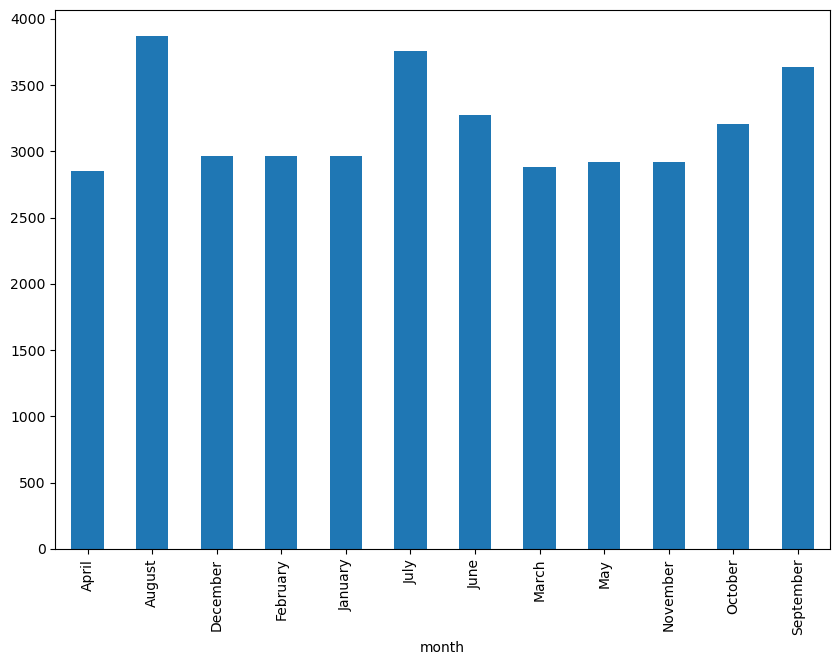

In [26]:
#Calculate the average load per month.
lo=fin.groupby(['month'])['load'].mean()

fin = fin.replace(np.nan, 0)

lo.plot(kind='bar', figsize=(10, 7))

C:\Users\jimts\AppData\Local\Temp\ipykernel_16012\1619308329.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lo=fin.groupby(['Range'])['load'].mean()


<Axes: xlabel='Range'>

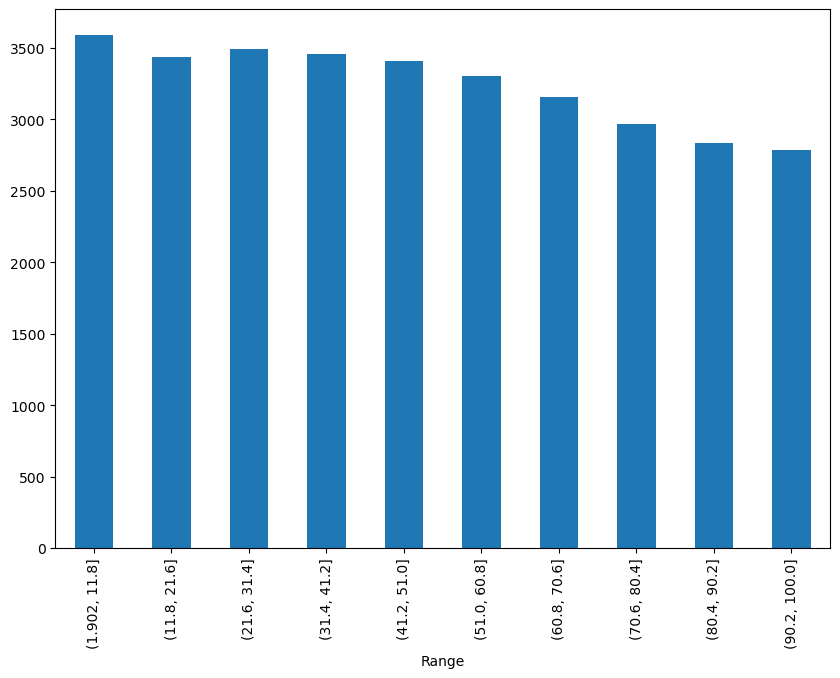

In [27]:
# Define the bins for the ranges
num_bins = 10
bins = pd.cut(fin['Humidity'], bins=num_bins)

# Create a new column in the DataFrame to store the ranges
fin['Range'] = bins

#Calculate the average load per month.
lo=fin.groupby(['Range'])['load'].mean()

fin = fin.replace(np.nan, 0)

lo.plot(kind='bar', figsize=(10, 7))



C:\Users\jimts\AppData\Local\Temp\ipykernel_16012\404711522.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lo=fin.groupby(['Range1'])['load'].mean()


<Axes: xlabel='Range1'>

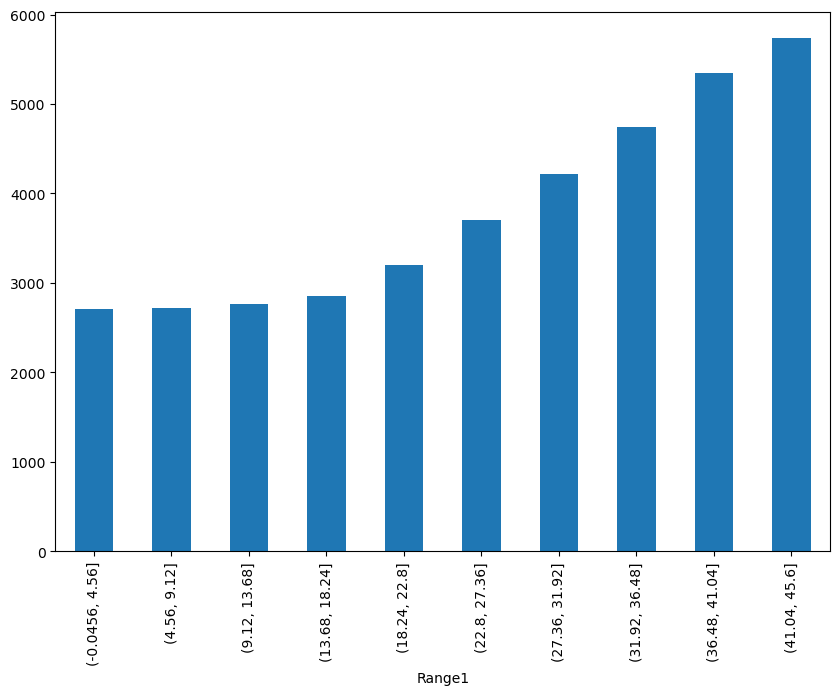

In [28]:
# Define the bins for the ranges
num_bins1 = 10
bins1 = pd.cut(fin['Temperature'], bins=num_bins1)

# Create a new column in the DataFrame to store the ranges
fin['Range1'] = bins1

#Calculate the average load per month.
lo=fin.groupby(['Range1'])['load'].mean()

fin = fin.replace(np.nan, 0)

lo.plot(kind='bar', figsize=(10, 7))